In [2]:
import torch
import torchvision
from torchvision import transforms,datasets

In [3]:
train = datasets.MNIST('', train = True, download = True, transform = transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST('', train = False, download = True, transform = transforms.Compose([transforms.ToTensor()]))

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw


Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw
Processing...
Done!


In [4]:
trainset = torch.utils.data.DataLoader(train, batch_size = 10, shuffle = True)

testset = torch.utils.data.DataLoader(test, batch_size = 10, shuffle = False)

In [5]:
for data in trainset:
    print(data)
    break


[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [6]:
X,y = data[0][0], data[1][0] 

In [8]:
print(data[1])

tensor([5, 8, 6, 1, 7, 2, 2, 0, 2, 4])


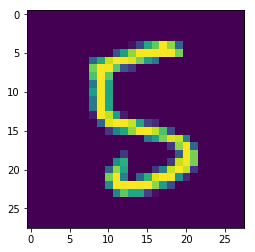

torch.Size([1, 28, 28])


In [12]:
# So, basically data[1][0] is just 5, however, let us analyse the associated image with it, that is, data[0][0]

import matplotlib.pyplot as plt
plt.imshow(data[0][0].view(28,28))
plt.show()

print(data[0][0].shape)

A very important thing to note that is in this case, input parameters might not be scaled. For example, The images are 8 bit quantized, so, the values range from 0 - 255. In that case, we simply have to divide the number by 255 so as to normalize it between 0 and 1. (or even -1 to 1 for that matter).

Another thing to think about is wheter our dataset is balenced? Since, given the required number of occurrences of each of the digit in the MNIST dataset, say, if the number of 5's are far more than each of the other digits, this might become an issue, since the NN might also spit out 5's more frequently due to its higher occurrance. So, we need to make sure that the data is balenced. Let us check that,

In [14]:
total = 0
counter_dict = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}

for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)]+= 1
        total+= 1

print(counter_dict)

for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*100.0}%")


{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
0: 9.871666666666666%
1: 11.236666666666666%
2: 9.93%
3: 10.218333333333334%
4: 9.736666666666666%
5: 9.035%
6: 9.863333333333333%
7: 10.441666666666666%
8: 9.751666666666667%
9: 9.915000000000001%


So, here we see that the data is roughly balenced, so, we can use this data. Now, let us jump to the making of the NN, through which we shall pass the training set through.

In [15]:
import torch.nn as nn
import torch.nn.functional as F

In [20]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
    
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim = 1)
        
        
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [21]:
# Now that we have made the neural network, let us test it, by adding a random image into it

X = torch.randn((28,28))
X = X.view(-1,28*28)
output = net(X)
print(output)

tensor([[-2.3993, -2.1045, -2.2159, -2.3624, -2.3029, -2.4378, -2.3796, -2.2727,
         -2.1475, -2.4727]], grad_fn=<LogSoftmaxBackward>)


Now, the only thing that is left is to specify the loss function and write the optmizer function.

In [22]:
import torch.optim as optim

In [23]:
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr = 0.001)

In [24]:
# Now let us jump to the training part
# Let us set the epoch = 3, that is, we shall go through the whole dataset 3 times

for epoch in range(3):
    for data in trainset:
        X,y = data
        net.zero_grad() # we set the gradients to zero before we update the loss function
        output = net(X.view(-1,784))
        loss = F.nll_loss(output,y)
        loss.backward() # Backpropagation for gradient calculation
        optimizer.step()
    print(loss)
# All these computations are currently done in CPU, but can also be done in GPU, for faster calculation.


tensor(0.0514, grad_fn=<NllLossBackward>)
tensor(0.0228, grad_fn=<NllLossBackward>)
tensor(0.0248, grad_fn=<NllLossBackward>)


In [26]:
# Now that the training is done, let us check the accuracy of our model,
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X,y = data
        output = net(X.view(-1,784))
        for idx,i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct+= 1
            total+= 1

print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.96


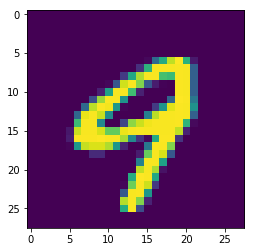

tensor(9)


In [33]:
plt.imshow(X[2].view(28,28))
plt.show()
print(torch.argmax(net(X[2].view(-1,784))[0]))